# Домашнее задание №10

## Задание 1

Подготовить тестовое изображение с одним объектом в градациях серого.

In [1]:
import cv2
import numpy as np
import skimage
import skimage.io
from matplotlib import pyplot as plt

src_image_url = 'https://drive.google.com/u/0/uc?id=1US_h4cdRc8STGhTXOzzdP-VuL5mBMZTa&export=download'
src_image = skimage.io.imread(src_image_url)
gray_image = cv2.cvtColor(src_image, cv2.COLOR_RGB2GRAY)

## Задание 2

Найти контур объекта.

In [2]:
thresholded_image = cv2.threshold(gray_image, np.iinfo(np.uint8).min, np.iinfo(np.uint8).max, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresholded_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0]
contours_with_length = [(cont, len(cont)) for cont in contours]
contours_with_length.sort(key=lambda pair: pair[1])
contours, num_of_points = map(list, zip(*contours_with_length))
contour = contours[-1]

contour_image = np.zeros(gray_image.shape)
cv2.drawContours(contour_image, [contour], -1, (255, 255, 255), 1);

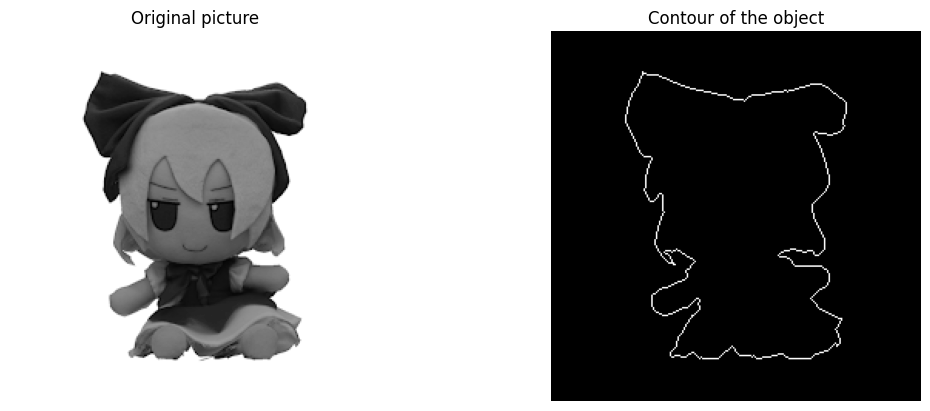

In [3]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Original picture")

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.axis("off")
plt.title("Contour of the object");

## Задание 3

Вычислить координаты центроида (через моменты) и построить его на изображении контура.

In [4]:
M = cv2.moments(contour)
centr_x = int(M['m10'] / M['m00'])
centr_y = int(M['m01'] / M['m00'])
centroid = [centr_x, centr_y]

cont_and_cent_image = contour_image.copy()
cv2.drawContours(cont_and_cent_image, np.array([[centroid]]), -1, (255, 255, 255), 5);

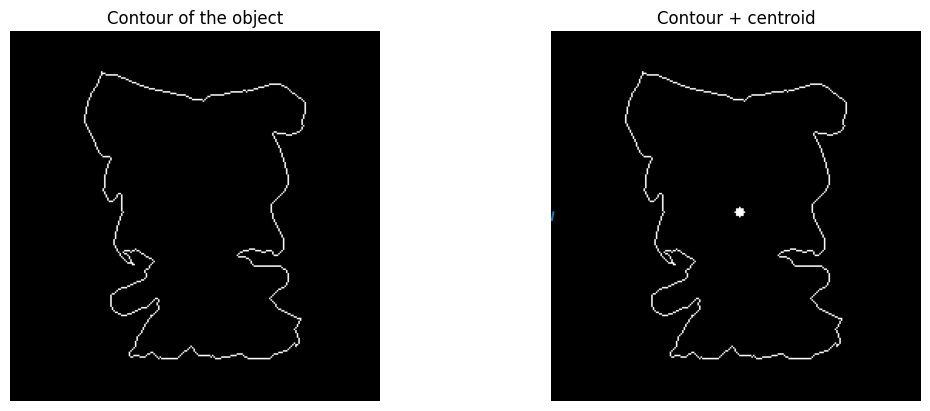

In [5]:
plt.figure(figsize=[6.4 * 2, 4.8])
plt.subplot(1, 2, 1)
plt.imshow(contour_image, cmap='gray')
plt.axis("off")
plt.title("Contour of the object")

plt.subplot(1, 2, 2)
plt.imshow(cont_and_cent_image, cmap='gray')
plt.plot(centroid, )
plt.axis("off")
plt.title("Contour + centroid");

## Задание 4

Вычислить периметр контура (cv.arcLength).

In [6]:
perimeter = cv2.arcLength(contour, True)
print(perimeter)

889.2346239089966


## Задание 5

Вычислить Фурье-дескрипторы для контура (numpy.fft.fft).

In [7]:
s_k = [complex(p[0][0], p[0][1]) for p in contour]
descriptors = np.fft.fft(s_k)
descriptors_shifted = np.fft.fftshift(descriptors)

## Задание 6

Восстановить контур с помощью 10%, 5%, 1% дескрипторов (остальные занулить).

In [8]:
percents = [10, 5, 1]
sequences = [np.zeros(descriptors.shape, dtype = 'complex') for i in range(len(percents))]

cent = int(len(descriptors) / 2)
for i in range(len(percents)):
    n = int(len(descriptors) * percents[i] / 200)
    sequences[i][cent - n : cent + n] = descriptors_shifted[cent - n : cent + n]
    sequences[i] = np.fft.ifftshift(sequences[i])

resotred = [np.fft.ifft(seq) for seq in sequences]
restored_contours = [np.array([[int(c.real), int(c.imag)] for c in seq]) for seq in resotred]

restored_images = []
for cnt in restored_contours:
    restored_images.append(np.zeros(contour_image.shape))
    cv2.drawContours(restored_images[-1], np.array([cnt]), -1, (255, 255, 255), 1)

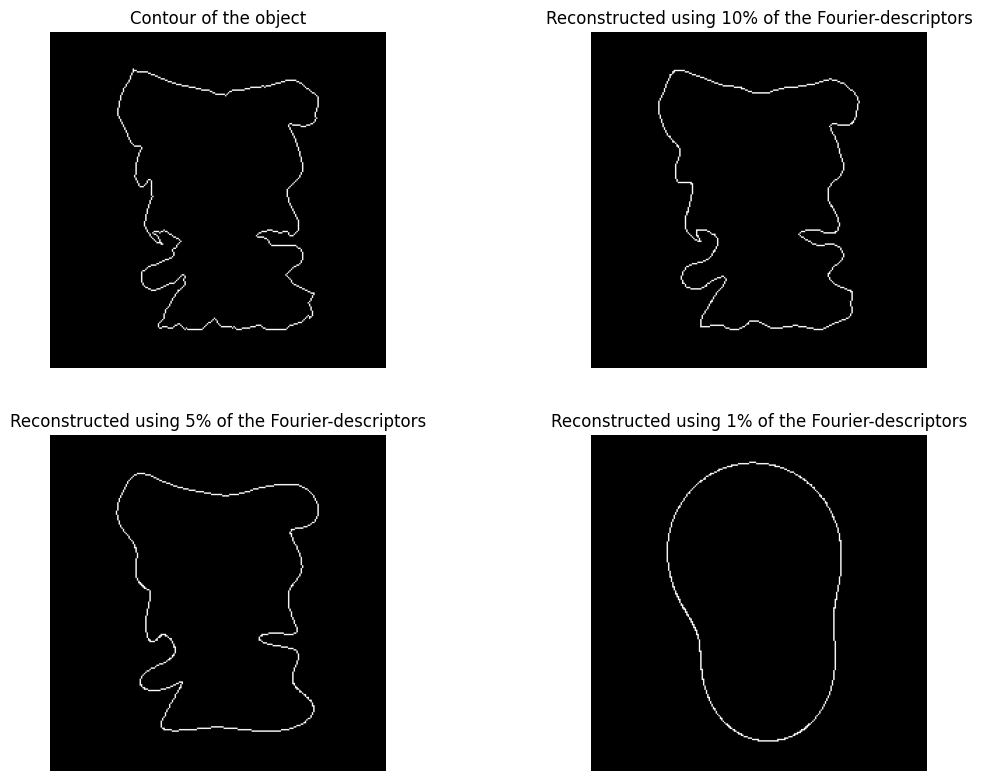

In [9]:
plt.figure(figsize=[6.4 * 2, 4.8 * 2])
plt.subplot(2, 2, 1)
plt.imshow(contour_image, cmap='gray')
plt.axis("off")
plt.title("Contour of the object")

for i in range(0, 3):
    plt.subplot(2, 2, 2 + i)
    plt.imshow(restored_images[i], cmap='gray')
    plt.axis("off")
    plt.title(f"Reconstructed using {percents[i]}% of the Fourier-descriptors")

### Выполнил: Лежнин Максим Витальевич